# Marketing evaluation with multiple linear regression


## Introduction

In this project, I continue to analyze the small business' historical marketing promotion data, including additional variables, to predict sales. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. I explore and clean the data, use plots and descriptive statistics to select the independent variables, create a multiple linear regression model, check model assumptions, and interpret model outputs to share results with stakeholders.

## Step 1: Imports

### Import packages

Import relevant Python libraries and modules.

In [1]:
# Import libraries and modules.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load dataset

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows.
data.head()


,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 2: Data exploration

#### Variables:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Nano," and "Micro" categories)


### Create a pairplot of the data

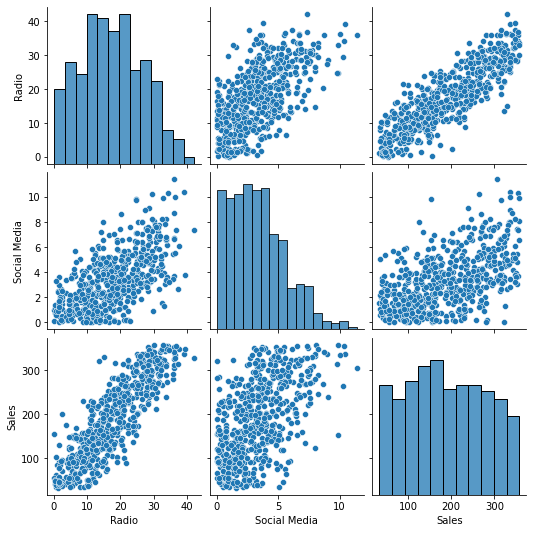

In [3]:
# Create a pairplot of the data to visualize the relationship between the continuous variables.
sns.pairplot(data);


Radio seems to have a linear relationship with sales. There might be a linear relationship between social media and sales, but it is less clear than with radio. Categorical variables are excluded from the preceding plot.

### Calculate the mean sales for each categorical variable

In [4]:
# Calculate the average sales for each TV category
averages_tv = data.groupby('TV')['Sales'].mean()

# Print the average sales for each TV category
print(averages_tv)
 
# Calculate the average sales for each Influencer category
averages_influencer = data.groupby('Influencer')['Sales'].mean()

# Print the average sales for each TV category
print(averages_influencer)

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64
Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


Tv could be a useful predictor as sales go up substantially from low to medium to high TV budget. There does not seem to be as much variation in the average sales for different categories of influencer.

### Remove missing data


In [5]:
#drop all rows with missing values
data = data.dropna(axis=0)
#reset index
data.reset_index(inplace=True, drop=True)

### Clean column names

In [5]:
# Rename columns in data that contain a space so ols() function will run. 
# Rename the column by removing the space
data.rename(columns={'Social Media': 'social_media'}, inplace=True)
data.head()

,TV,Radio,social_media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

Radio and TV budget variables were selected for the model since exploratory data analysis indicated they were most most strongly related to Sales.

In [6]:
# Define the OLS formula.
# Write out OLS formula as a string
ols_formula = "Sales ~ Radio + C(TV)"

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_summary = model.summary()

# Display the model results.
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.63e-288
Time:                        02:40:20   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

### Model assumption: Linearity

Scatterplot above indicates linear relationship between Radio and Sales. 

### Model assumption: Independence

Each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

<function matplotlib.pyplot.show(*args, **kw)>

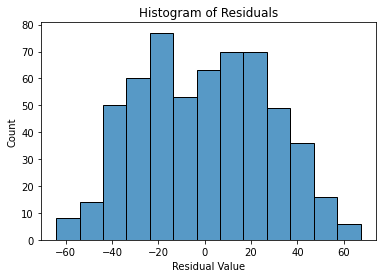

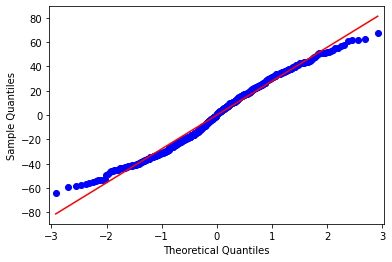

In [7]:
# Calculate the residuals.
residuals = model.resid

# Create a histogram with the residuals. 
fig = sns.histplot(residuals)
fig.set_xlabel('Residual Value')
fig.set_title('Histogram of Residuals')
plt.show

# Create a Q-Q plot of the residuals.
fig = sm.qqplot(residuals, line = 's')
plt.show


The histogram generally resembles normal distribution and the values are close to the line in the QQ plot.

### Model assumption: Constant variance

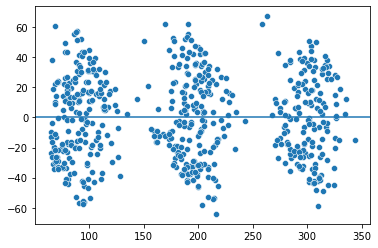

In [8]:
# Create a scatterplot with the fitted values from the model and the residuals. 
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Add a line at y = 0 to visualize the variance of residuals above and below 0. 
fig.axhline(0)

# Show the plot.
plt.show()


There are gaps between the low and middle and the middle and high values, due to the categorical variable, but at each level, the variance appears to be randomly distributed.

### Model assumption: No multicollinearity

In [9]:
# Calculate the variance inflation factor

# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = data[['Radio','social_media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif


,VIF
Radio,5.170922
social_media,5.170922


The model I used had only one continuous variable, so there are no mutlicollinearity issues.
If I had used radio and social media, the assumption would have been violated since on a scatterplot radio and social media look moderately linearly related and they have a VIF of 5.17 indicating high multicollinearity.


## Step 4: Results and evaluation

### OLS regression results


In [10]:
# Display the model results summary.
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.63e-288
Time:                        02:40:20   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluation

With adjusted R-squared of .904, the model explains about 90% of the variance in sales. 
A high TV budget was the best predictor of increased sales. Not changing the radio budget, if a low TV budget is used rather than a high TV budget, on average sales would be expected to be 154.29 less, with 95% confidence that the sales would be between 163.98 and 144.62 less. When TV budget is constant, radio budget has a positive relationship (about 3x) with sales. The coefficients are statistically significant at p<.05.

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).